# Import

In [1]:
### 기본
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

### tuning
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings

### model 
import lightgbm as lgb

### os
from tqdm import tqdm
import gc
import random
import re

warnings.filterwarnings(action='ignore')

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import time

# Data load

In [2]:
train_numeric = pd.read_csv('train_numeric_out_log_scaling.csv')
test_numeric = pd.read_csv('test_numeric_out_log_scaling.csv')
train_sparse = pd.read_csv('train_part_pca.csv')
test_sparse = pd.read_csv('test_part_pca.csv')
train_prob = pd.read_csv('prob_train.csv')
test_prob = pd.read_csv('prob_test.csv')
train_share = pd.read_csv('train_share_fillna.csv')
test_share = pd.read_csv('test_share_fillna.csv')

In [3]:
train_x = pd.concat([train_numeric, train_sparse], axis = 1)
train_x = pd.concat([train_x, train_prob], axis = 1)
train_x = pd.concat([train_x, train_share], axis = 1)
#train_x = np.array(train_x)
test_x = pd.concat([test_numeric, test_sparse], axis = 1)
test_x = pd.concat([test_x, test_prob], axis = 1)
test_x = pd.concat([test_x, test_share], axis = 1)
#test_x = np.array(test_x)

In [4]:
train_x

,model_nm_cnt,fwver_cnt,errtype_cnt,errcode_cnt,error_datetime_cnt,2020-10-31 00:00:00,2020-11-01 00:00:00,2020-11-02 00:00:00,2020-11-03 00:00:00,2020-11-04 00:00:00,...,496,497,498,499,500,501,502,503,504,505
0,1.0,1.0,0.388889,0.151641,0.366065,0.0,0.518143,0.497861,0.518579,0.468189,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1.0,2.0,0.722222,0.772928,0.952569,0.0,0.518143,0.727085,0.711526,0.738487,...,0.482376,1.093927,0.0,0.223297,0.223297,0.000000,0.0,2.394592,1.427859,0.223297
2,1.0,1.0,0.444444,0.269264,0.365058,0.0,0.500000,0.526134,0.506591,0.507444,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,1.0,2.0,0.500000,0.811991,0.321603,0.0,0.480126,0.526134,0.487336,0.439843,...,0.471405,0.000000,0.0,0.212959,0.212959,0.212959,0.0,0.722179,0.212959,0.000000
4,1.0,2.0,0.500000,0.772928,0.620789,0.0,0.679366,0.668438,0.723706,0.711654,...,0.574108,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.542586,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.0,1.0,0.472222,0.684871,0.186316,0.0,0.000000,0.000000,0.000000,0.000000,...,0.497930,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.113404,1.493789,0.481046
14996,1.0,1.0,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
14997,1.0,2.0,0.583333,0.811991,0.640005,0.0,0.480126,0.654472,0.676423,0.743505,...,0.751729,3.796047,0.0,0.000000,0.000000,0.000000,0.0,3.162278,0.000000,0.000000
14998,1.0,2.0,0.388889,0.579095,0.101769,0.0,0.433597,0.293523,0.342508,0.258156,...,0.566947,2.226922,0.0,0.185577,0.185577,0.000000,0.0,0.618590,0.000000,0.000000


In [5]:
train_y = np.array(pd.read_csv('train_y.csv').drop(['user_id'],axis=1).ploblem)
test_id = pd.read_csv('test_x.csv').user_id

In [6]:
# 학습데이터 70%, 평가데이터 30%로 데이터 분할
X_train, X_dev, y_train, y_dev = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

In [8]:
clfs = [
    (
       CatBoostClassifier(random_state=0, verbose=False),
       {'n_estimators': range(10, 310, 10),
        'depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        'random_strength': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
        'l2_leaf_reg': [1,2,3,4,5,6,7,8,9,10,20,30,50,100,200],
        'boost_from_average' : [False]}
    ),
    (
        LGBMClassifier(random_state=0),
        {'num_iteration': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],
         'max_depth':[3,4,6,8,10],
         'min_data_in_leaf':[5,10,50,70,100],
         'num_leaves':[15,31,35],
         'boosting':['gbdt','rf'],
         'n_estimators': range(10, 200, 10),
         'min_split_gain': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         #'reg_alpha': [0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
         'reg_lambda': [0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
         'feature_fraction': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         #'bagging_fraction': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
         'bagging_freq': [1, 2, 3, 4, 5, 6, 7],
         'min_child_samples': range(5,50,5),
         'boost_from_average' : [False]
         }
    ),
    (
        XGBClassifier(random_state=0),
        {'learning_rate': [1, 0.1, 0.01],
         'n_estimators': [100, 200, 300],
         'max_depth':[3,4,6,8,10],
         'subsamle':[0.3, 0.5, 0.7, 1],
         'min_child_weight':[10,20,50,100],
         'objective':['binary:logistic'],
         'eval_metric':['error'],
         'min_split_loss':[10,20,50,100],
         'colsample_bytree': [0.5, 0.7, 0.9, 1],
         'reg_alpha': [0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
         'reg_lambda': [0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1,2,3,4,5,10],
         'scale_pos_weight': np.arange(0.0, 50.1, 0.1)
        }
    ),
    (
        KNeighborsClassifier(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터
         'weights': ['uniform','distance'],
         'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
         'leaf_size': [10, 20, 30, 40],
         'p': [1,2],
         'metric': ['minkowski', 'euclidean', 'manhattan']}
    ),
    (
        MLPClassifier(random_state=0),
        {'batch_size': ['auto', 32, 64, 128],
         'learning_rate' : ['constant', 'adaptive','invscaling'],
         'activation': ['tanh', 'relu'],
         'solver': ['sgd', 'adam'],
         'hidden_layer_sizes': [10,30,50,100],
         'alpha': [1e-07,1e-06,0.0001,0.001,0.01,0.0005,0.005,0.05,0.1,0.15,0.2,0.3,0.4,0.5,0.7,0.9]}
    ),
    (
        LogisticRegression(random_state=0),  
        {'C': np.arange(0.1, 1.1, 0.1),      
         'penalty': ['l1','l2'],
         'max_iter' : [100, 300, 500, 1000],
         'solver' : ['liblinear']}
    ),
    (
        RandomForestClassifier(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [None,3,4,5,6],
         'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int),
         'criterion': ['gini','entropy'],
         'min_samples_split':[2,3,4],
         'min_samples_leaf':[1,2,4],
         'min_impurity_decrease': [0,0.0001,0.001,0.01,0.0002,0.002,0.02,0.0005,0.005,0.05,0.1,0.2,0.3,0.4,0.5],
         'bootstrap': [True, False],
         'class_weight': ['balanced', 'balanced_subsample', {}]}
    ),
    (
        GradientBoostingClassifier(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],
         'criterion': ['friedman_mse', 'mse', 'mae'],
         'loss': ['deviance', 'exponential'],
         'min_samples_split': [2, 4, 5, 7, 9, 10],
         'min_samples_leaf': [1, 2, 3, 4, 5],
         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
         'min_impurity_decrease': [0,0.0001,0.001,0.01,0.0002,0.002,0.02,0.0005,0.005,0.05,0.1,0.2,0.3,0.4,0.5],
         'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)
        }
    ),
    (
        DecisionTreeClassifier(random_state=0),
        {'criterion' :['gini','entropy'],
         'max_depth':[3,4,6,8,10],
         'min_samples_leaf':[3,5,10,50,100],
         'splitter':["best","random"]
        }
    )
]

clfs_tuned = []  # 튜닝된 모델을 저장
start_time = time.time()
for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=8, scoring='roc_auc', 
                                     cv=3, random_state=0, n_jobs=-1)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(X_dev, y_dev)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    print('final params', rand_search.best_params_)
    clfs_tuned.append((clf_name, rand_search, clf_score))
    #globals()['{}_pred'.format(clf_name)] = pd.DataFrame(rand_search.best_estimator_.predict(test_x))
print('모델 수행 시간: {0:.1f} 초'.format(time.time()- start_time))

 11%|████████▋                                                                     | 1/9 [1:13:51<9:50:54, 4431.75s/it]

CatBoostClassifier                                   0.844722 4431.8
final params {'random_strength': 0.7, 'n_estimators': 250, 'l2_leaf_reg': 8, 'depth': 11, 'boost_from_average': False}
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=45 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=300, num_iteration=300 will be ignored. Current value: num_iterations=300


 22%|█████████████████▎                                                            | 2/9 [1:14:38<6:03:33, 3116.20s/it]

LGBMClassifier                                       0.843684 46.5
final params {'reg_lambda': 2, 'num_leaves': 15, 'num_iteration': 300, 'n_estimators': 140, 'min_split_gain': 0.8, 'min_data_in_leaf': 10, 'min_child_samples': 45, 'max_depth': 10, 'learning_rate': 0.01, 'feature_fraction': 0.7, 'boosting': 'gbdt', 'boost_from_average': False, 'bagging_freq': 6}
[04:24:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boost_from_average, subsamle } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




 33%|██████████████████████████                                                    | 3/9 [1:24:44<3:56:19, 2363.26s/it]

XGBClassifier                                        0.843428 606.4
final params {'subsamle': 1, 'scale_pos_weight': 3.4000000000000004, 'reg_lambda': 0.005, 'reg_alpha': 0.001, 'objective': 'binary:logistic', 'n_estimators': 200, 'min_split_loss': 10, 'min_child_weight': 20, 'max_depth': 10, 'learning_rate': 0.01, 'eval_metric': 'error', 'colsample_bytree': 0.9, 'boost_from_average': False}


 44%|██████████████████████████████████▋                                           | 4/9 [1:26:08<2:19:56, 1679.37s/it]

KNeighborsClassifier                                 0.688530 83.6
final params {'weights': 'distance', 'p': 2, 'n_neighbors': 11, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'ball_tree'}


 56%|███████████████████████████████████████████▎                                  | 5/9 [1:28:48<1:21:34, 1223.61s/it]

MLPClassifier                                        0.725472 160.2
final params {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 10, 'batch_size': 'auto', 'alpha': 0.0001, 'activation': 'relu'}


 67%|████████████████████████████████████████████████████                          | 6/9 [2:31:13<1:38:59, 1979.90s/it]

LogisticRegression                                   0.828759 3744.6
final params {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'C': 0.4}


 78%|██████████████████████████████████████████████████████████████▏                 | 7/9 [2:46:18<55:15, 1657.52s/it]

RandomForestClassifier                               0.807629 905.3
final params {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0002, 'max_features': 669, 'max_depth': 4, 'criterion': 'gini', 'class_weight': {}, 'bootstrap': True}


 89%|█████████████████████████████████████████████████████████████████████▎        | 8/9 [6:17:48<1:22:47, 4967.37s/it]

GradientBoostingClassifier                           0.842888 12690.4
final params {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.0005, 'max_features': 502, 'max_depth': 10, 'loss': 'deviance', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}


100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [6:18:00<00:00, 2520.10s/it]

DecisionTreeClassifier                               0.804388 12.1
final params {'splitter': 'best', 'min_samples_leaf': 50, 'max_depth': 6, 'criterion': 'gini'}
모델 수행 시간: 22680.9 초


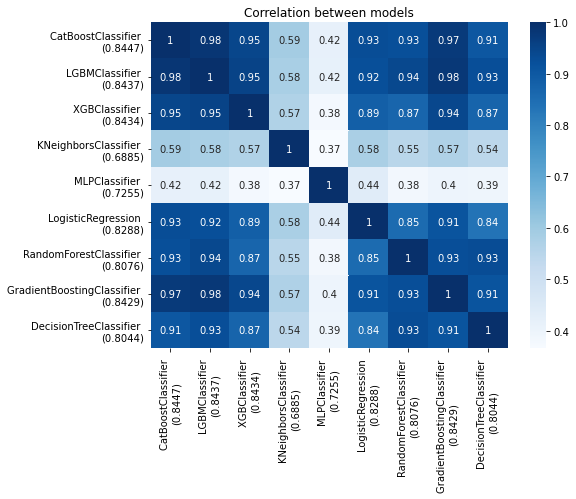

In [9]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_dev)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [10]:
# Mean agreement
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

CatBoostClassifier \n(0.8447)            0.834318
LGBMClassifier \n(0.8437)                0.838597
XGBClassifier \n(0.8434)                 0.802497
KNeighborsClassifier \n(0.6885)          0.544104
MLPClassifier \n(0.7255)                 0.399450
LogisticRegression \n(0.8288)            0.794849
RandomForestClassifier \n(0.8076)        0.798209
GradientBoostingClassifier \n(0.8429)    0.827223
DecisionTreeClassifier \n(0.8044)        0.790422
dtype: float64

In [11]:
ensemble_results

,CatBoostClassifier \n(0.8447),LGBMClassifier \n(0.8437),XGBClassifier \n(0.8434),KNeighborsClassifier \n(0.6885),MLPClassifier \n(0.7255),LogisticRegression \n(0.8288),RandomForestClassifier \n(0.8076),GradientBoostingClassifier \n(0.8429),DecisionTreeClassifier \n(0.8044)
0,0.211004,0.182161,0.456512,0.538486,9.999511e-01,0.443234,0.159041,0.201468,0.279070
1,0.169459,0.197866,0.419613,0.180984,1.875524e-79,0.138973,0.219564,0.167028,0.185420
2,0.155252,0.137664,0.335119,0.093895,7.247522e-136,0.150741,0.160414,0.130564,0.185420
3,0.443630,0.347749,0.586962,0.374880,2.389424e-50,0.390418,0.418931,0.250353,0.321911
4,0.129529,0.157610,0.359843,0.177898,1.304274e-96,0.153815,0.160272,0.121269,0.185420
...,...,...,...,...,...,...,...,...,...
4495,0.259733,0.305928,0.623835,0.512551,8.679527e-82,0.390576,0.290388,0.307847,0.255474
4496,0.173538,0.187083,0.361509,0.172109,1.529039e-104,0.196190,0.160326,0.134564,0.099350
4497,0.125532,0.206578,0.382155,0.000000,2.027948e-102,0.200237,0.154996,0.138843,0.099350
4498,0.115077,0.158196,0.292330,0.253579,3.251425e-106,0.134074,0.159083,0.157981,0.099350


In [13]:
# Averaging 앙상블에 사용하지 않을 모델은 주석 처리하시오.
selected = [
    'KNeighborsClassifier', 
    'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'DecisionTreeClassifier',
    'XGBClassifier',
    'LGBMClassifier',
    'CatBoostClassifier',
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [14]:
# 아래 코드는 추후 estimator class("BlendingClassifier")로 만들 예정

max_score = 0
for p in tqdm([0, 1, 2.56]):  # p==1:산술평균, p=0:기하평균, 그 외:멱평균(주의:멱평균은 과적합 가능성이 높음)    
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_dev)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_dev)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_dev, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [3:10:08<00:00, 3802.83s/it]

p=2.56
CatBoostClassifier●XGBClassifier●LogisticRegression●GradientBoostingClassifier
0.8489432413625112


In [17]:
# 2-layer stacking

# Initialize 1st level estimators
# 사용하지 않을 모델은 주석 처리하세요.
selected = [
    #'KNeighborsClassifier', 
    #'MLPClassifier',
    'LogisticRegression', 
    'RandomForestClassifier', 
    'GradientBoostingClassifier',
    'DecisionTreeClassifier',
    'XGBClassifier',
    'LGBMClassifier',
    'CatBoostClassifier',  
]

estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected]
stk_clf = StackingClassifier(
    estimators = estimators, final_estimator = ExtraTreesClassifier(), cv=3)

stk_clf.fit(X_train, y_train)
print(roc_auc_score(y_dev, stk_clf.predict_proba(X_dev)[:,1]))

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=45 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] num_iterations is set=300, num_iteration=300 will be ignored. Current value: num_iterations=300
[14:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { boost_from_average, subsamle } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[LightGBM] [War

In [19]:
# Apply the best averaging ensemble model to Unseen Data
t = pd.Timestamp.now()
if p == 0:
    pred_mean = gmean([clf.predict_proba(test_x)[:,1] for name, clf, _ in models], axis=0)
else:
    preds = [clf.predict_proba(test_x)[:,1] for name, clf, _ in models]
    pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
pd.DataFrame({'user_id': test_id, 'problem': pred_mean}).to_csv(f'submission_avg_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv',index=False)

# Apply the stacking model to Unseen Data
pd.DataFrame({'user_id': test_id, 'problem': stk_clf.predict_proba(test_x)[:,1]}).to_csv(f'submission_stk_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv', index=False)

In [2]:
import pickle
import joblib

In [22]:
joblib.dump(stk_clf,'numeric_part_pca_share_stk_0.8323636928990032.pkl')
joblib.dump(clf,'numeric_part_pca_share_avg_0.8489432413625112.pkl')

['numeric_part_pca_share_avg_0.8489432413625112.pkl']

In [3]:
x = joblib.load('numeric_part_pca_share_avg_0.8489432413625112.pkl')

In [4]:
x

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 6, 8, 10],
                                        'min_samples_leaf': [3, 5, 10, 50, 100],
                                        'splitter': ['best', 'random']},
                   random_state=0, scoring='roc_auc')

# Model

In [29]:
def f_pr_auc(probas_pred, y_true):
    labels = y_true.get_label()
    p, r, _ = precision_recall_curve(labels, probas_pred)
    score=auc(r,p) 
    return "pr_auc", score, True

### LGBM

In [30]:
models     = []    ### model name
recalls    = []    
precisions = []
auc_scores   = []
threshold = 0.5    ### 문턱값

In [31]:
# 파라미터 설정
params =      {
                'boosting_type' : 'gbdt',
                'objective'     : 'binary',
                'metric'        : 'auc',
                'seed': 1015
                }

In [32]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in k_fold.split(train_x):
    
    X = train_x[train_idx]
    y = train_y[train_idx]
    valid_x = train_x[val_idx]
    valid_y = train_y[val_idx]

    d_train= lgb.Dataset(X, y)
    d_val  = lgb.Dataset(valid_x, valid_y)
    
    #run traning
    model = lgb.train(
                        params,
                        train_set       = d_train,
                        num_boost_round = 1000, ### 돌리는 횟수
                        valid_sets      = d_val,
                        feval           = f_pr_auc, ### validation 점수
                        verbose_eval    = 20,       
                        early_stopping_rounds = 3 ### 3번 연속 값이 유효성 점수 향상 x => stop
                       )
    
    # cal valid prediction
    valid_prob = model.predict(valid_x)
    valid_pred = np.where(valid_prob > threshold, 1, 0)
    
    # cal scores
    recall    = recall_score(    valid_y, valid_pred)
    precision = precision_score( valid_y, valid_pred)
    auc_score = roc_auc_score(   valid_y, valid_prob)

    # append scores
    models.append(model)
    recalls.append(recall)
    precisions.append(precision)
    auc_scores.append(auc_score)

    print('==========================================================')

Training until validation scores don't improve for 3 rounds.
[20]	valid_0's auc: 0.797673	valid_0's pr_auc: 0.792522
Early stopping, best iteration is:
[25]	valid_0's auc: 0.801171	valid_0's pr_auc: 0.797338
Training until validation scores don't improve for 3 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.788479	valid_0's pr_auc: 0.318902
Training until validation scores don't improve for 3 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.758498	valid_0's pr_auc: 0.358092
Training until validation scores don't improve for 3 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.807468	valid_0's pr_auc: 0.551358
Training until validation scores don't improve for 3 rounds.
Early stopping, best iteration is:
[14]	valid_0's auc: 0.802301	valid_0's pr_auc: 0.974445


In [39]:
models

In [20]:
# 예측
pred_y_list = []
for model in models:
    pred_y = model.predict_proba(test_x)
    pred_y_list.append(pred_y.reshape(-1,1))
    
pred_ensemble = np.mean(pred_y_list, axis = 0)

AttributeError: 'tuple' object has no attribute 'predict_proba'

In [50]:
pred_ensemble

array([[0.58413718],
       [0.26337558],
       [0.31536181],
       ...,
       [0.38028413],
       [0.6155689 ],
       [0.33541155]])

In [17]:
sample_submssion = pd.read_csv('sample_submission.csv')

In [18]:
sample_submssion['problem'] = pred_ensemble.reshape(-1)

In [19]:
t = pd.Timestamp.now()
sample_submssion.to_csv(f"dacon_baseline_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv", index = False)
sample_submssion

,user_id,problem
0,30000,0.584137
1,30001,0.263376
2,30002,0.315362
3,30003,0.539370
4,30004,0.464485
...,...,...
14994,44994,0.320964
14995,44995,0.320746
14996,44996,0.380284
14997,44997,0.615569
